#### Bar chart example

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_dataset(num_rows, num_products, num_regions, start_date, end_date):
    # Generate random product names and regions
    products = np.random.choice([f"Product {i}" for i in range(num_products)], size=num_rows)
    regions = np.random.choice([f"Region {i}" for i in range(num_regions)], size=num_rows)
    
    # Generate random time periods between start_date and end_date
    start_timestamp = datetime.timestamp(datetime.strptime(start_date, '%Y-%m-%d'))
    end_timestamp = datetime.timestamp(datetime.strptime(end_date, '%Y-%m-%d'))
    date = [datetime.fromtimestamp(np.random.uniform(start_timestamp, end_timestamp)).strftime('%Y-%m-%d')
                    for _ in range(num_rows)]
    
    # Generate random sales amounts
    sales_amount = np.random.uniform(0, 1000000, size=num_rows)
    
    # Create a DataFrame with the generated data
    data = {'products': products, 'regions': regions, 'date': date, 'sales_amount': sales_amount}
    df = pd.DataFrame(data)
    return df

In [0]:
df = generate_dataset(1000, 10, 5, '2022-01-01', '2022-12-31')
df.head()

,products,regions,date,sales_amount
0,Product 4,Region 1,2022-12-09,952918.348418
1,Product 4,Region 3,2022-03-26,888777.788028
2,Product 2,Region 2,2022-09-22,866650.904831
3,Product 0,Region 1,2022-09-25,499027.561948
4,Product 1,Region 0,2022-09-30,276150.038014


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

def generate_product_barchart(dataframe):
    # Group the data by products and sum the sales_amount
    grouped = dataframe.groupby(['products'])['sales_amount'].sum()
    
    # Create a bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.bar(grouped.index, grouped.values)
    
    # Set the title and axis labels
    ax.set_title('Sales Amount by Product')
    ax.set_xlabel('Product')
    ax.set_ylabel('Sales Amount ($)')
    
    # Format the y-axis labels as millions with a dollar sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    
    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

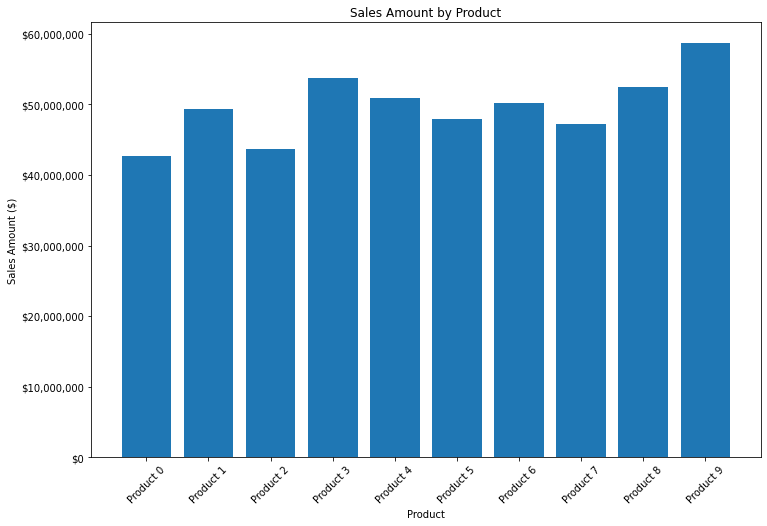

In [0]:
generate_product_barchart(df)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

def generate_product_barchart(dataframe):
    # Group the data by products and sum the sales_amount
    grouped = dataframe.groupby(['products'])['sales_amount'].sum()
    # Sort the grouped dataframe by sales_amount in descending order
    grouped = grouped.sort_values(ascending=False)
    
    # Create a horizontal bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.barh(grouped.index, grouped.values)
    
    # Set the title and axis labels
    ax.set_title('Sales Amount by Product')
    ax.set_xlabel('Sales Amount ($)')
    ax.set_ylabel('Product')
    
    # Format the x-axis labels as millions with a dollar sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.xaxis.set_major_formatter(tick)
    
    # Show the plot
    plt.show()

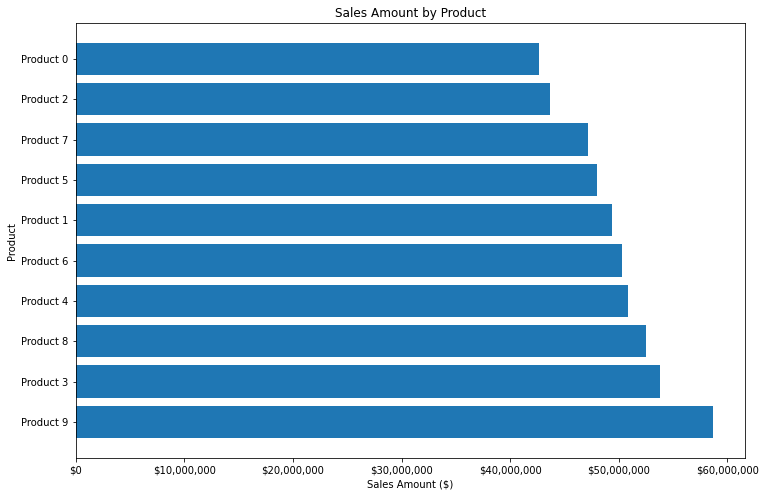

In [0]:
generate_product_barchart(df)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

def generate_region_product_barchart(dataframe):
    # Group the data by regions and products and sum the sales_amount
    grouped = dataframe.groupby(['regions', 'products'])['sales_amount'].sum().unstack()
    
    # Create a bar chart
    ax = grouped.plot(kind='bar', figsize=(12, 8))
    
    # Set the title and axis labels
    ax.set_title('Sales Amount by Region and Product')
    ax.set_xlabel('Region')
    ax.set_ylabel('Sales Amount ($)')
    
    # Format the y-axis labels as millions with a dollar sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    
    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

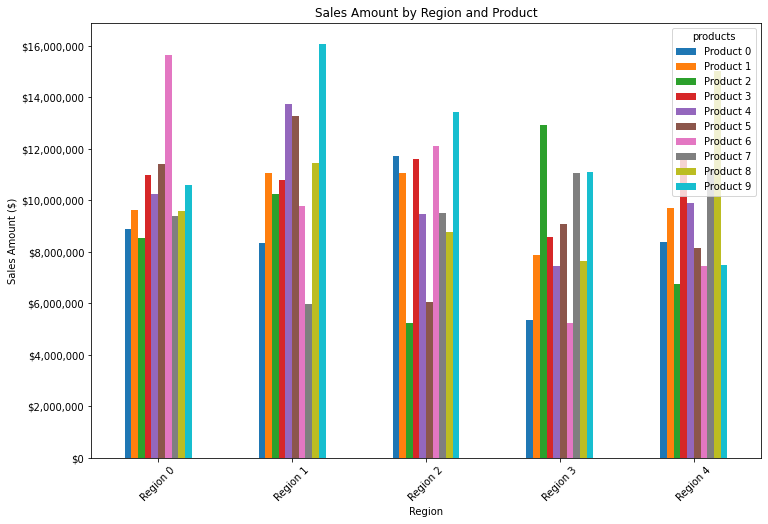

In [0]:
generate_region_product_barchart(df)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mtick

def generate_region_product_barchart(dataframe):
    # Group the data by regions and products and sum the sales_amount
    grouped = dataframe.groupby(['regions', 'products'])['sales_amount'].sum().unstack()
    
    # Create a stacked bar chart
    ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
    
    # Set the title and axis labels
    ax.set_title('Sales Amount by Region and Product')
    ax.set_xlabel('Region')
    ax.set_ylabel('Sales Amount ($)')
    
    # Format the y-axis labels as millions with a dollar sign
    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    
    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

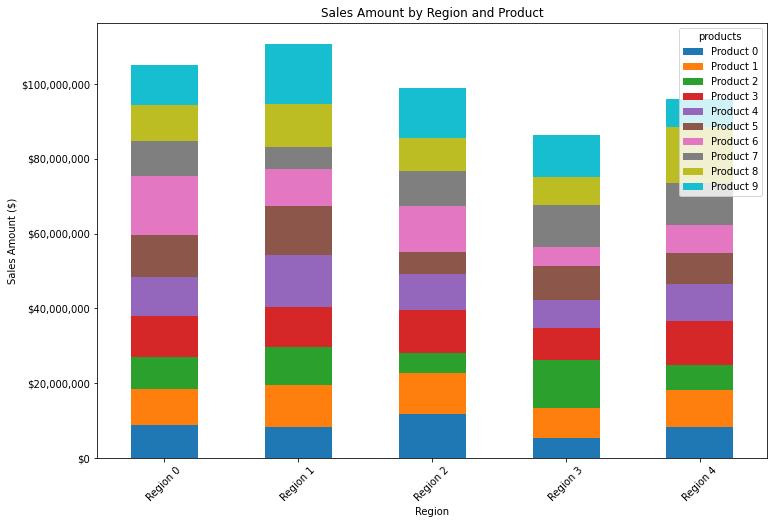

In [0]:
generate_region_product_barchart(df)

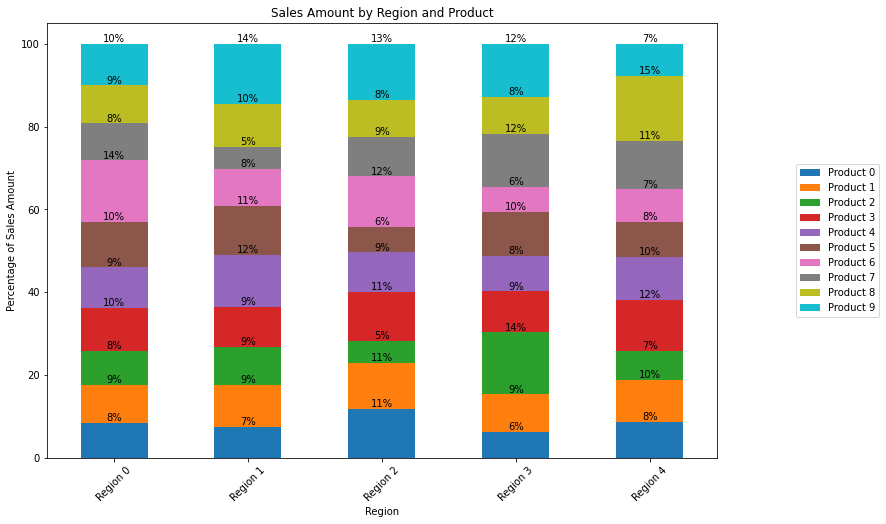

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def generate_region_product_barchart(dataframe):
    # Group the data by regions and products and calculate the percentage of sales_amount
    grouped = dataframe.groupby(['regions', 'products'])['sales_amount'].sum().unstack()
    totals = grouped.sum(axis=1)
    percent_grouped = grouped.divide(totals, axis=0) * 100
    
    # Create a 100% stacked bar chart
    ax = percent_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
    
    # Set the title and axis labels
    ax.set_title('Sales Amount by Region and Product')
    ax.set_xlabel('Region')
    ax.set_ylabel('Percentage of Sales Amount')
    
    # Format the y-axis labels as percentages
    #fmt = '%.0f%%'
    #tick = mtick.StrMethodFormatter(fmt)
    #ax.yaxis.set_major_formatter(tick)
    
    # Add the percent annotation to the bars
    for i in ax.containers:
        ax.bar_label(i, label_type='edge', labels=[f'{int(j.get_height())}%' for j in i])
    
    # Move the legend to the right middle side of the plot
    ax.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    
    # Rotate the x-axis labels for better visibility
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()
    
# call the above function
generate_region_product_barchart(df)